## 케라스 기초 예제 돌려보기(MNIST)

In [30]:
# 케라스 기초 예제 돌려보기(MNIST)
import keras
from keras.datasets import mnist
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # 현재 컴퓨터에서 사용 가능한 자원 출력. GPU를 사용하려면 CUDA와 cuDNN이 설치되어야 함 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # mnist.load_data()는 4개의 아웃풋을 제공. 

train_images.shape 
print(len(train_labels), train_images.shape[0])


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15855152774177576835
]


60000 60000


## MNIST 학습해보기

[5 0 4 ... 5 6 8]


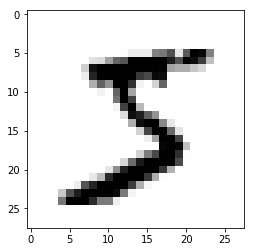

In [20]:
# MNIST train data 한장 출력해보기
import matplotlib.pyplot as plt

digit = train_images[0]
print(train_labels)
plt.imshow(digit, cmap=plt.cm.binary) # 'digit라는 matrix를 넣어 binary 이미지를 출력하겠다.'
plt.show()


In [21]:
# Keras로 간단한 이미지 분류 모델 만들기
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # Dense : Dense는 Keras에서 fully-connected layer를 의미.
network.add(layers.Dense(10, activation='softmax')) # 뉴런 10개를 붙이고 softmax로 활성화

network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy', # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
                metrics=['accuracy'])

# 학습 데이터 전처리
# error을 weight로 미분한 후 learning rate와 곱한 만큼 역전파를 하는데, 이때 고르게 에러를 갱신하려면 0~1 범위로 정규화해주어야 한다. 
train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype('float32') / 255 # 256으로 나눔.
test_images = test_images.reshape((10000, 28*28)) 
test_images = test_images.astype('float32') / 255 # 256으로 나눔.

In [22]:
from keras.utils import to_categorical

# 범주형 데이터로 변환
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)

(60000, 10)


In [28]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
  128/60000 [..............................] - ETA: 4s - loss: 0.0161 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0196 - acc: 0.9941

 1920/60000 [..............................] - ETA: 3s - loss: 0.0245 - acc: 0.9932

 3072/60000 [>.............................] - ETA: 3s - loss: 0.0214 - acc: 0.9941

 4096/60000 [=>............................] - ETA: 3s - loss: 0.0205 - acc: 0.9946

 5120/60000 [=>............................] - ETA: 3s - loss: 0.0204 - acc: 0.9941

 5760/60000 [=>............................] - ETA: 3s - loss: 0.0223 - acc: 0.9931

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.0218 - acc: 0.9933

 7296/60000 [==>...........................] - ETA: 3s - loss: 0.0213 - acc: 0.9936

 8320/60000 [===>..........................] - ETA: 3s - loss: 0.0222 - acc: 0.9931

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0219 - acc: 0.9932

10624/60000 [====>.........................] - ETA: 2s - loss: 0.0227 - acc: 0.9929

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0226 - acc: 0.9925

12928/60000 [=====>........................] - ETA: 2s - loss: 0.0258 - acc: 0.9921

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0261 - acc: 0.9920

15232/60000 [======>.......................] - ETA: 2s - loss: 0.0262 - acc: 0.9916

16256/60000 [=======>......................] - ETA: 2s - loss: 0.0271 - acc: 0.9912

17280/60000 [=======>......................] - ETA: 2s - loss: 0.0270 - acc: 0.9913

18304/60000 [========>.....................] - ETA: 2s - loss: 0.0267 - acc: 0.9914

19200/60000 [========>.....................] - ETA: 2s - loss: 0.0264 - acc: 0.9916

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0260 - acc: 0.9917

21376/60000 [=========>....................] - ETA: 2s - loss: 0.0257 - acc: 0.9919

22400/60000 [==========>...................] - ETA: 2s - loss: 0.0260 - acc: 0.9918

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0266 - acc: 0.9918

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0264 - acc: 0.9919

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0267 - acc: 0.9919

26752/60000 [============>.................] - ETA: 1s - loss: 0.0267 - acc: 0.9919

27776/60000 [============>.................] - ETA: 1s - loss: 0.0264 - acc: 0.9919

28672/60000 [=============>................] - ETA: 1s - loss: 0.0266 - acc: 0.9918

29824/60000 [=============>................] - ETA: 1s - loss: 0.0267 - acc: 0.9916

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0265 - acc: 0.9917

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0262 - acc: 0.9919

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0260 - acc: 0.9920

34048/60000 [================>.............] - ETA: 1s - loss: 0.0258 - acc: 0.9920

35200/60000 [================>.............] - ETA: 1s - loss: 0.0258 - acc: 0.9919

36224/60000 [=================>............] - ETA: 1s - loss: 0.0266 - acc: 0.9917

37120/60000 [=================>............] - ETA: 1s - loss: 0.0266 - acc: 0.9917

38144/60000 [==================>...........] - ETA: 1s - loss: 0.0267 - acc: 0.9917

39168/60000 [==================>...........] - ETA: 1s - loss: 0.0265 - acc: 0.9917

40320/60000 [===================>..........] - ETA: 1s - loss: 0.0263 - acc: 0.9918

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0260 - acc: 0.9919

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0265 - acc: 0.9918

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0266 - acc: 0.9917

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0267 - acc: 0.9917

45440/60000 [=====================>........] - ETA: 0s - loss: 0.0271 - acc: 0.9915

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0271 - acc: 0.9916

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0273 - acc: 0.9915

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0271 - acc: 0.9915

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0270 - acc: 0.9916

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0271 - acc: 0.9916

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0272 - acc: 0.9915

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0274 - acc: 0.9915

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0275 - acc: 0.9915

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0274 - acc: 0.9916

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0274 - acc: 0.9916

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0276 - acc: 0.9916

58496/60000 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9916

59520/60000 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9916

60000/60000 [==============================] - 3s 51us/step - loss: 0.0275 - acc: 0.9916


Epoch 2/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0092 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0154 - acc: 0.9955

 1920/60000 [..............................] - ETA: 3s - loss: 0.0175 - acc: 0.9953

 3072/60000 [>.............................] - ETA: 3s - loss: 0.0171 - acc: 0.9951

 4096/60000 [=>............................] - ETA: 3s - loss: 0.0202 - acc: 0.9937

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0192 - acc: 0.9939

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0198 - acc: 0.9939

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0192 - acc: 0.9942

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0195 - acc: 0.9940

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0191 - acc: 0.9943

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0184 - acc: 0.9946

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0196 - acc: 0.9943

12160/60000 [=====>........................] - ETA: 2s - loss: 0.0208 - acc: 0.9940

13184/60000 [=====>........................] - ETA: 2s - loss: 0.0208 - acc: 0.9940

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0205 - acc: 0.9940

14976/60000 [======>.......................] - ETA: 2s - loss: 0.0201 - acc: 0.9941

15872/60000 [======>.......................] - ETA: 2s - loss: 0.0201 - acc: 0.9941

16896/60000 [=======>......................] - ETA: 2s - loss: 0.0199 - acc: 0.9941

17920/60000 [=======>......................] - ETA: 2s - loss: 0.0197 - acc: 0.9941

19072/60000 [========>.....................] - ETA: 2s - loss: 0.0195 - acc: 0.9941

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0195 - acc: 0.9942

21248/60000 [=========>....................] - ETA: 2s - loss: 0.0194 - acc: 0.9942

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0197 - acc: 0.9942

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0207 - acc: 0.9938

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0211 - acc: 0.9938

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0211 - acc: 0.9937

26880/60000 [============>.................] - ETA: 1s - loss: 0.0209 - acc: 0.9937

27904/60000 [============>.................] - ETA: 1s - loss: 0.0212 - acc: 0.9935

28928/60000 [=============>................] - ETA: 1s - loss: 0.0219 - acc: 0.9934

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0216 - acc: 0.9935

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0216 - acc: 0.9935

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0221 - acc: 0.9933

34432/60000 [================>.............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

35456/60000 [================>.............] - ETA: 1s - loss: 0.0217 - acc: 0.9935

36608/60000 [=================>............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

37760/60000 [=================>............] - ETA: 1s - loss: 0.0221 - acc: 0.9934

39040/60000 [==================>...........] - ETA: 1s - loss: 0.0221 - acc: 0.9933

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0220 - acc: 0.9933

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0219 - acc: 0.9933

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0218 - acc: 0.9933

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0217 - acc: 0.9933

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0218 - acc: 0.9933

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0218 - acc: 0.9933

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0217 - acc: 0.9933

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0216 - acc: 0.9933

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0215 - acc: 0.9933

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0218 - acc: 0.9933

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0216 - acc: 0.9934

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0217 - acc: 0.9933

58880/60000 [============================>.] - ETA: 0s - loss: 0.0219 - acc: 0.9932

60000/60000 [==============================] - 3s 48us/step - loss: 0.0218 - acc: 0.9931


Epoch 3/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0020 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0086 - acc: 0.9971

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0138 - acc: 0.9954

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0145 - acc: 0.9948

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0126 - acc: 0.9960

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0151 - acc: 0.9957

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0142 - acc: 0.9960

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0146 - acc: 0.9957

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0169 - acc: 0.9949

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0181 - acc: 0.9946

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0176 - acc: 0.9950

13696/60000 [=====>........................] - ETA: 2s - loss: 0.0177 - acc: 0.9950

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0170 - acc: 0.9953

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0164 - acc: 0.9955

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0159 - acc: 0.9957

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0163 - acc: 0.9955

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0163 - acc: 0.9955

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0161 - acc: 0.9955

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0157 - acc: 0.9956

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0159 - acc: 0.9957

26112/60000 [============>.................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

27264/60000 [============>.................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

28416/60000 [=============>................] - ETA: 1s - loss: 0.0168 - acc: 0.9955

29696/60000 [=============>................] - ETA: 1s - loss: 0.0166 - acc: 0.9955

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0163 - acc: 0.9956

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0161 - acc: 0.9957

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0162 - acc: 0.9956

34816/60000 [================>.............] - ETA: 1s - loss: 0.0164 - acc: 0.9954

36096/60000 [=================>............] - ETA: 1s - loss: 0.0164 - acc: 0.9954

37376/60000 [=================>............] - ETA: 0s - loss: 0.0163 - acc: 0.9954

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0166 - acc: 0.9953

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0168 - acc: 0.9953

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0166 - acc: 0.9953

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0170 - acc: 0.9952

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0169 - acc: 0.9952

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0168 - acc: 0.9952

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0168 - acc: 0.9952

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0166 - acc: 0.9952

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0165 - acc: 0.9952

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0164 - acc: 0.9952

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0163 - acc: 0.9953

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0163 - acc: 0.9953

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0163 - acc: 0.9952

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0166 - acc: 0.9952

58624/60000 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9952

59648/60000 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9951

60000/60000 [==============================] - 3s 44us/step - loss: 0.0168 - acc: 0.9951


Epoch 4/10
  128/60000 [..............................] - ETA: 4s - loss: 0.0020 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0093 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0083 - acc: 0.9982

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0090 - acc: 0.9974

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0119 - acc: 0.9960

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0122 - acc: 0.9962

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0130 - acc: 0.9962

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0142 - acc: 0.9963

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0136 - acc: 0.9966

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0128 - acc: 0.9967

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0124 - acc: 0.9966

13696/60000 [=====>........................] - ETA: 2s - loss: 0.0125 - acc: 0.9966

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0127 - acc: 0.9965

16256/60000 [=======>......................] - ETA: 1s - loss: 0.0125 - acc: 0.9965

17536/60000 [=======>......................] - ETA: 1s - loss: 0.0131 - acc: 0.9964

18816/60000 [========>.....................] - ETA: 1s - loss: 0.0133 - acc: 0.9963

20096/60000 [=========>....................] - ETA: 1s - loss: 0.0130 - acc: 0.9964

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0128 - acc: 0.9965

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0125 - acc: 0.9966

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0122 - acc: 0.9967

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0122 - acc: 0.9967

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

27264/60000 [============>.................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

28544/60000 [=============>................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

29696/60000 [=============>................] - ETA: 1s - loss: 0.0123 - acc: 0.9966

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0123 - acc: 0.9965

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0123 - acc: 0.9965

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0124 - acc: 0.9964

34560/60000 [================>.............] - ETA: 1s - loss: 0.0126 - acc: 0.9964

35840/60000 [================>.............] - ETA: 1s - loss: 0.0124 - acc: 0.9964

37120/60000 [=================>............] - ETA: 0s - loss: 0.0123 - acc: 0.9964

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0124 - acc: 0.9964

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0121 - acc: 0.9965

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0125 - acc: 0.9963

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9964

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9964

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0125 - acc: 0.9964

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0126 - acc: 0.9964

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0129 - acc: 0.9963

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0132 - acc: 0.9962

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0131 - acc: 0.9962

58624/60000 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9963

59904/60000 [============================>.] - ETA: 0s - loss: 0.0133 - acc: 0.9963

60000/60000 [==============================] - 3s 43us/step - loss: 0.0133 - acc: 0.9963


Epoch 5/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0100 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0057 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 2s - loss: 0.0124 - acc: 0.9982

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0104 - acc: 0.9980

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0096 - acc: 0.9979

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0098 - acc: 0.9973

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0110 - acc: 0.9971

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0106 - acc: 0.9970

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0102 - acc: 0.9971

10752/60000 [====>.........................] - ETA: 2s - loss: 0.0101 - acc: 0.9971

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0104 - acc: 0.9971

13312/60000 [=====>........................] - ETA: 2s - loss: 0.0100 - acc: 0.9972

14464/60000 [======>.......................] - ETA: 2s - loss: 0.0100 - acc: 0.9972

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0098 - acc: 0.9973

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0094 - acc: 0.9975

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0092 - acc: 0.9974

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0090 - acc: 0.9975

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9975

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9975

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0089 - acc: 0.9974

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0091 - acc: 0.9974

27136/60000 [============>.................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

28416/60000 [=============>................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

29696/60000 [=============>................] - ETA: 1s - loss: 0.0088 - acc: 0.9975

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0091 - acc: 0.9975

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.9976

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.9975

34688/60000 [================>.............] - ETA: 1s - loss: 0.0089 - acc: 0.9975

35968/60000 [================>.............] - ETA: 1s - loss: 0.0090 - acc: 0.9975

37248/60000 [=================>............] - ETA: 0s - loss: 0.0092 - acc: 0.9974

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0094 - acc: 0.9974

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0093 - acc: 0.9974

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0092 - acc: 0.9975

41856/60000 [===================>..........] - ETA: 0s - loss: 0.0094 - acc: 0.9974

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0095 - acc: 0.9974

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0096 - acc: 0.9973

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0095 - acc: 0.9973

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0097 - acc: 0.9973

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0096 - acc: 0.9973

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0096 - acc: 0.9973

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0097 - acc: 0.9973

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0098 - acc: 0.9972

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0099 - acc: 0.9971

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0100 - acc: 0.9970

59008/60000 [============================>.] - ETA: 0s - loss: 0.0100 - acc: 0.9970

60000/60000 [==============================] - 3s 44us/step - loss: 0.0101 - acc: 0.9970


Epoch 6/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0041 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0049 - acc: 0.9989

 1792/60000 [..............................] - ETA: 3s - loss: 0.0058 - acc: 0.9983

 2944/60000 [>.............................] - ETA: 3s - loss: 0.0052 - acc: 0.9986

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.9988

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.9991

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.9986

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.9988

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.9985

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.9986

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.9985

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0056 - acc: 0.9983

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0053 - acc: 0.9985

14720/60000 [======>.......................] - ETA: 2s - loss: 0.0053 - acc: 0.9986

16000/60000 [=======>......................] - ETA: 2s - loss: 0.0057 - acc: 0.9985

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.9984

18560/60000 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.9984

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.9985

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.9985

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.9984

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.9983

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.9983

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.9983

27008/60000 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.9981

28288/60000 [=============>................] - ETA: 1s - loss: 0.0072 - acc: 0.9980

29568/60000 [=============>................] - ETA: 1s - loss: 0.0072 - acc: 0.9980

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0072 - acc: 0.9980

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0072 - acc: 0.9980

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0075 - acc: 0.9980

34432/60000 [================>.............] - ETA: 1s - loss: 0.0075 - acc: 0.9980

35712/60000 [================>.............] - ETA: 1s - loss: 0.0076 - acc: 0.9980

36992/60000 [=================>............] - ETA: 1s - loss: 0.0077 - acc: 0.9979

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.9980

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0078 - acc: 0.9978

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0078 - acc: 0.9978

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.9979

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.9979

48256/60000 [=======================>......] - ETA: 0s - loss: 0.0077 - acc: 0.9979

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0076 - acc: 0.9980

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.9980

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0074 - acc: 0.9980

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.9981

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.9980

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.9981

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9980

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9980

59264/60000 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.9980

60000/60000 [==============================] - 3s 44us/step - loss: 0.0077 - acc: 0.9980


Epoch 7/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0022 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0064 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.9991

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.9991

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.9989

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.9992

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.9986

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.9987

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.9989

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.9987

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0054 - acc: 0.9988

13184/60000 [=====>........................] - ETA: 2s - loss: 0.0051 - acc: 0.9989

14464/60000 [======>.......................] - ETA: 2s - loss: 0.0050 - acc: 0.9988

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.9988

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.9986

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.9986

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.9987

27136/60000 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

28416/60000 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.9986

29696/60000 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.9985

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.9986

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.9986

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

34432/60000 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

35584/60000 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

36864/60000 [=================>............] - ETA: 1s - loss: 0.0052 - acc: 0.9986

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.9986

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.9986

40576/60000 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.9985

41856/60000 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.9985

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.9984

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.9984

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.9984

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.9983

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.9983

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.9984

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.9984

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.9984

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.9984

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9984

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9984

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.9983

58112/60000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9983

59264/60000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9983

60000/60000 [==============================] - 3s 44us/step - loss: 0.0061 - acc: 0.9983


Epoch 8/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0053 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0030 - acc: 1.0000

 2048/60000 [>.............................] - ETA: 3s - loss: 0.0026 - acc: 1.0000

 3328/60000 [>.............................] - ETA: 2s - loss: 0.0044 - acc: 0.9991

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0040 - acc: 0.9991

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0036 - acc: 0.9993

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0034 - acc: 0.9993

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0033 - acc: 0.9992

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0034 - acc: 0.9991

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0033 - acc: 0.9991

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0033 - acc: 0.9990

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0034 - acc: 0.9990

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0034 - acc: 0.9990

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0043 - acc: 0.9990

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0041 - acc: 0.9991

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0041 - acc: 0.9990

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.9988

26112/60000 [============>.................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

27392/60000 [============>.................] - ETA: 1s - loss: 0.0045 - acc: 0.9989

28544/60000 [=============>................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

29568/60000 [=============>................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0045 - acc: 0.9989

31872/60000 [==============>...............] - ETA: 1s - loss: 0.0047 - acc: 0.9989

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0046 - acc: 0.9989

34432/60000 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

35712/60000 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

36992/60000 [=================>............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.9988

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.9987

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.9988

45696/60000 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.9987

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.9986

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.9986

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.9987

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.9986

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.9986

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0049 - acc: 0.9986

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0048 - acc: 0.9987

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.9986

58240/60000 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9985

59520/60000 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9986

60000/60000 [==============================] - 3s 44us/step - loss: 0.0051 - acc: 0.9986


Epoch 9/10


  128/60000 [..............................] - ETA: 4s - loss: 9.2231e-04 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 6.7197e-04 - acc: 1.0000

 2176/60000 [>.............................] - ETA: 3s - loss: 9.6805e-04 - acc: 1.0000

 3328/60000 [>.............................] - ETA: 2s - loss: 0.0015 - acc: 0.9994    

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0022 - acc: 0.9993

 5760/60000 [=>............................] - ETA: 2s - loss: 0.0020 - acc: 0.9995

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0019 - acc: 0.9996

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0019 - acc: 0.9995

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0024 - acc: 0.9994

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0023 - acc: 0.9993

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0023 - acc: 0.9992

12928/60000 [=====>........................] - ETA: 2s - loss: 0.0024 - acc: 0.9991

14208/60000 [======>.......................] - ETA: 2s - loss: 0.0023 - acc: 0.9992

15488/60000 [======>.......................] - ETA: 2s - loss: 0.0023 - acc: 0.9993

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0024 - acc: 0.9993

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0031 - acc: 0.9992

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0032 - acc: 0.9992

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0031 - acc: 0.9992

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0030 - acc: 0.9992

26496/60000 [============>.................] - ETA: 1s - loss: 0.0030 - acc: 0.9993

27776/60000 [============>.................] - ETA: 1s - loss: 0.0034 - acc: 0.9992

29056/60000 [=============>................] - ETA: 1s - loss: 0.0034 - acc: 0.9992

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0033 - acc: 0.9993

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

32640/60000 [===============>..............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

33792/60000 [===============>..............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

35072/60000 [================>.............] - ETA: 1s - loss: 0.0031 - acc: 0.9994

36352/60000 [=================>............] - ETA: 1s - loss: 0.0031 - acc: 0.9994

37632/60000 [=================>............] - ETA: 0s - loss: 0.0033 - acc: 0.9993

38912/60000 [==================>...........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

40192/60000 [===================>..........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0034 - acc: 0.9992

45184/60000 [=====================>........] - ETA: 0s - loss: 0.0033 - acc: 0.9992

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0033 - acc: 0.9993

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0033 - acc: 0.9992

49024/60000 [=======================>......] - ETA: 0s - loss: 0.0033 - acc: 0.9992

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0033 - acc: 0.9992

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0036 - acc: 0.9992

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0036 - acc: 0.9992

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0035 - acc: 0.9992

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9993

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9992

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9992

58880/60000 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 0.9992

60000/60000 [==============================] - 3s 44us/step - loss: 0.0036 - acc: 0.9992


Epoch 10/10
  128/60000 [..............................] - ETA: 3s - loss: 1.9416e-04 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0027 - acc: 0.9990    

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0021 - acc: 0.9995

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0016 - acc: 0.9997

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0015 - acc: 0.9998

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0017 - acc: 0.9995

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0019 - acc: 0.9995

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0018 - acc: 0.9995

 9600/60000 [===>..........................] - ETA: 2s - loss: 0.0020 - acc: 0.9995

10880/60000 [====>.........................] - ETA: 2s - loss: 0.0022 - acc: 0.9994

12160/60000 [=====>........................] - ETA: 2s - loss: 0.0022 - acc: 0.9994

13440/60000 [=====>........................] - ETA: 2s - loss: 0.0022 - acc: 0.9995

14592/60000 [======>.......................] - ETA: 2s - loss: 0.0021 - acc: 0.9995

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0020 - acc: 0.9996

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0019 - acc: 0.9996

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

19072/60000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

20352/60000 [=========>....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0022 - acc: 0.9996

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

26624/60000 [============>.................] - ETA: 1s - loss: 0.0022 - acc: 0.9994

27904/60000 [============>.................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

29184/60000 [=============>................] - ETA: 1s - loss: 0.0021 - acc: 0.9995

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0025 - acc: 0.9994

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0024 - acc: 0.9994

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0025 - acc: 0.9994

34048/60000 [================>.............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

35328/60000 [================>.............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

36608/60000 [=================>............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

37888/60000 [=================>............] - ETA: 0s - loss: 0.0028 - acc: 0.9993

38784/60000 [==================>...........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0031 - acc: 0.9993

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0031 - acc: 0.9993

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0030 - acc: 0.9993

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0030 - acc: 0.9993

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0031 - acc: 0.9993

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0032 - acc: 0.9992

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0032 - acc: 0.9992

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0032 - acc: 0.9993

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0031 - acc: 0.9993

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0031 - acc: 0.9992

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0031 - acc: 0.9992

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0031 - acc: 0.9992

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0031 - acc: 0.9992

58240/60000 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9992

59520/60000 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9992

60000/60000 [==============================] - 3s 44us/step - loss: 0.0031 - acc: 0.9992


In [29]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc : ',  test_acc)

   32/10000 [..............................] - ETA: 0s

 2080/10000 [=====>........................] - ETA: 0s

 4928/10000 [=============>................] - ETA: 0s

 7776/10000 [======================>.......] - ETA: 0s

10000/10000 [==============================] - 0s 19us/step


test acc :  0.9828


## IMDB(Internet 

In [31]:
# 영화 리뷰 데이터로 감정분류해보기
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 많이 쓰인 단어들을 만 개 가져와서 숫자 인덱스로 매핑
print(train_data.shape)

    8192/17464789 [..............................] - ETA: 0s

   24576/17464789 [..............................] - ETA: 2:20

   57344/17464789 [..............................] - ETA: 1:59

  122880/17464789 [..............................] - ETA: 1:09

  139264/17464789 [..............................] - ETA: 1:13

  262144/17464789 [..............................] - ETA: 51s 

  524288/17464789 [..............................] - ETA: 31s

 1048576/17464789 [>.............................] - ETA: 16s

 1064960/17464789 [>.............................] - ETA: 18s

 2113536/17464789 [==>...........................] - ETA: 9s 

 2146304/17464789 [==>...........................] - ETA: 9s

 2392064/17464789 [===>..........................] - ETA: 9s

 2686976/17464789 [===>..........................] - ETA: 12s

 3227648/17464789 [====>.........................] - ETA: 10s

 3637248/17464789 [=====>........................] - ETA: 10s

 4046848/17464789 [=====>........................] - ETA: 9s 

 4800512/17464789 [=======>......................] - ETA: 8s

 5210112/17464789 [=======>......................] - ETA: 7s

 5963776/17464789 [=========>....................] - ETA: 6s

 6520832/17464789 [==========>...................] - ETA: 5s

 6897664/17464789 [==========>...................] - ETA: 5s

 7766016/17464789 [============>.................] - ETA: 4s

 8257536/17464789 [=============>................] - ETA: 4s

 9142272/17464789 [==============>...............] - ETA: 3s

 9601024/17464789 [===============>..............] - ETA: 3s

10534912/17464789 [=================>............] - ETA: 2s

10665984/17464789 [=================>............] - ETA: 2s

12156928/17464789 [===================>..........] - ETA: 1s

12304384/17464789 [====================>.........] - ETA: 1s

12435456/17464789 [====================>.........] - ETA: 1s

13189120/17464789 [=====================>........] - ETA: 1s

13287424/17464789 [=====================>........] - ETA: 1s

13434880/17464789 [======================>.......] - ETA: 1s

14221312/17464789 [=======================>......] - ETA: 1s

14336000/17464789 [=======================>......] - ETA: 1s

14434304/17464789 [=======================>......] - ETA: 1s

15253504/17464789 [=========================>....] - ETA: 0s

15286272/17464789 [=========================>....] - ETA: 0s

15319040/17464789 [=========================>....] - ETA: 0s

15466496/17464789 [=========================>....] - ETA: 0s

15564800/17464789 [=========================>....] - ETA: 0s

15745024/17464789 [==========================>...] - ETA: 0s

15941632/17464789 [==========================>...] - ETA: 0s

16138240/17464789 [==========================>...] - ETA: 0s

16400384/17464789 [===========================>..] - ETA: 0s

17137664/17464789 [============================>.] - ETA: 0s

17465344/17464789 [==============================] - 7s 0us/step


(25000,)


In [32]:
train_data[0]
# 숫자들은 영어 단어에 인덱스를 붙여놓은 것. ('I was happy'인 경우, I는 1번, was는 43번 등등과 같이 인덱싱을 해 둔것.)

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [33]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index() 
# 정수 인덱스와 단어를 매핑하도록 뒤집음. (value를 알고 있고, 그것에 해당하는 key를 알고 싶은 상태이기 때문.) 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # items()을 통해 딕셔너리 하나씩 가져오게 됨. 
# 리뷰를 디코딩. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이기 때문에 3을 뺀다. 
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # '?'는 우리가 불러오기로 한 10000개 밖에 있는 단어를 의미.

   8192/1641221 [..............................] - ETA: 18s

  24576/1641221 [..............................] - ETA: 19s

  57344/1641221 [>.............................] - ETA: 11s

  90112/1641221 [>.............................] - ETA: 8s 

 139264/1641221 [=>............................] - ETA: 6s

 196608/1641221 [==>...........................] - ETA: 5s

 262144/1641221 [===>..........................] - ETA: 4s

 319488/1641221 [====>.........................] - ETA: 3s

 385024/1641221 [======>.......................] - ETA: 3s

 458752/1641221 [=======>......................] - ETA: 2s

 647168/1641221 [==========>...................] - ETA: 1s

 720896/1641221 [============>.................] - ETA: 1s

 925696/1641221 [===============>..............] - ETA: 1s

 999424/1641221 [=================>............] - ETA: 0s

1220608/1641221 [=====================>........] - ETA: 0s

1277952/1641221 [======================>.......] - ETA: 0s

1515520/1641221 [==========================>...] - ETA: 0s

1589248/1641221 [============================>.] - ETA: 0s

1646592/1641221 [==============================] - 2s 1us/step


In [34]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듬.
    results = np.zeros((len(sequences), dimension)) # 2차원 매트릭스가 전부 0
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듬. 
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

In [39]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [63]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [64]:
from keras import optimizers
from keras import losses
from keras import metrics

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # Dense : Dense는 Keras에서 fully-connected layer를 의미.
network.add(layers.Dense(16, activation='relu')) 
network.add(layers.Dense(1, activation='sigmoid')) # 0~1사이값이 나오도록 함. 

network.compile(optimizer=optimizers.RMSprop(lr = 0.001),
                loss = 'binary_crossentropy', # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
                metrics=['accuracy'])
# 네트워크를 정의하는 다른 방법
# network.compile(optimizer=optimizers.RMSprop(lr = 0.001),
#                 loss = losses.binary_crossentropy, # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
#                 metrics=[metrics.binary_accuracy])


In [65]:
# 훈련 검증(훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 원본 훈련 데이터에서 만 개의 샘플 추출)
x_val = x_train[:10000] # 0~10000까지 validation으로 사용하겠다
partial_x_train = x_train[10000:] # 10000~끝까지 train용으로 쓰겠다.

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [66]:
history = network.fit(partial_x_train, partial_y_train, 
                    epochs = 20, 
                    batch_size = 512,
                    validation_data = (x_val, y_val)) # 리뷰 데이터를 512개씩 넣어서 학습


Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 14s - loss: 0.6943 - acc: 0.5117

 1024/15000 [=>............................] - ETA: 7s - loss: 0.6897 - acc: 0.5439 

 1536/15000 [==>...........................] - ETA: 5s - loss: 0.6842 - acc: 0.5729

 2048/15000 [===>..........................] - ETA: 4s - loss: 0.6754 - acc: 0.6045

 2560/15000 [====>.........................] - ETA: 3s - loss: 0.6653 - acc: 0.6160

 3072/15000 [=====>........................] - ETA: 3s - loss: 0.6574 - acc: 0.6289

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.6459 - acc: 0.6518

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.6353 - acc: 0.6702

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.6243 - acc: 0.6838

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.6177 - acc: 0.6879

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.6116 - acc: 0.6948

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.6052 - acc: 0.7026

 6656/15000 [============>.................] - ETA: 1s - loss: 0.5981 - acc: 0.7112

 7168/15000 [=============>................] - ETA: 1s - loss: 0.5906 - acc: 0.7182

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.5838 - acc: 0.7258

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.5783 - acc: 0.7299

 8704/15000 [================>.............] - ETA: 0s - loss: 0.5728 - acc: 0.7354

 9216/15000 [=================>............] - ETA: 0s - loss: 0.5666 - acc: 0.7421

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5608 - acc: 0.7477

10240/15000 [===================>..........] - ETA: 0s - loss: 0.5556 - acc: 0.7525

10752/15000 [====================>.........] - ETA: 0s - loss: 0.5500 - acc: 0.7578

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5445 - acc: 0.7622

11776/15000 [======================>.......] - ETA: 0s - loss: 0.5388 - acc: 0.7670

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5343 - acc: 0.7699

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5285 - acc: 0.7745

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5242 - acc: 0.7773

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5196 - acc: 0.7804

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5145 - acc: 0.7841

14848/15000 [============================>.] - ETA: 0s - loss: 0.5105 - acc: 0.7862

15000/15000 [==============================] - 3s 199us/step - loss: 0.5089 - acc: 0.7875 - val_loss: 0.3784 - val_acc: 0.8701


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3353 - acc: 0.9160

 1024/15000 [=>............................] - ETA: 1s - loss: 0.3252 - acc: 0.9170

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3347 - acc: 0.9043

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.3350 - acc: 0.9004

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.3367 - acc: 0.8965

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.3362 - acc: 0.8965

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.3351 - acc: 0.8962

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.3313 - acc: 0.8977

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.3273 - acc: 0.8978

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.3237 - acc: 0.8988

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3218 - acc: 0.9009

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3208 - acc: 0.9009

 7168/15000 [=============>................] - ETA: 0s - loss: 0.3189 - acc: 0.8998

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3155 - acc: 0.9022

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3133 - acc: 0.9022

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3139 - acc: 0.9011

10240/15000 [===================>..........] - ETA: 0s - loss: 0.3127 - acc: 0.9016

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3113 - acc: 0.9013

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3099 - acc: 0.9023

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3079 - acc: 0.9017

13312/15000 [=========================>....] - ETA: 0s - loss: 0.3070 - acc: 0.9008

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3045 - acc: 0.9006

14848/15000 [============================>.] - ETA: 0s - loss: 0.3037 - acc: 0.9008

15000/15000 [==============================] - 2s 150us/step - loss: 0.3037 - acc: 0.9005 - val_loss: 0.3044 - val_acc: 0.8863


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2035 - acc: 0.9492

 1024/15000 [=>............................] - ETA: 1s - loss: 0.2140 - acc: 0.9463

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2182 - acc: 0.9408

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.2192 - acc: 0.9395

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.2212 - acc: 0.9387

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.2210 - acc: 0.9385

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.2240 - acc: 0.9355

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.2243 - acc: 0.9345

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2218 - acc: 0.9352

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2226 - acc: 0.9355

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2241 - acc: 0.9341

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2235 - acc: 0.9331

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2229 - acc: 0.9325

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2230 - acc: 0.9315

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2224 - acc: 0.9315

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2240 - acc: 0.9293

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2244 - acc: 0.9282

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2238 - acc: 0.9282

15000/15000 [==============================] - 2s 135us/step - loss: 0.2233 - acc: 0.9281 - val_loss: 0.2799 - val_acc: 0.8893


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1657 - acc: 0.9512

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1717 - acc: 0.9486

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1657 - acc: 0.9527

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1672 - acc: 0.9509

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1698 - acc: 0.9492

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1730 - acc: 0.9457

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1750 - acc: 0.9443

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1760 - acc: 0.9436

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1759 - acc: 0.9436

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1784 - acc: 0.9431

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1773 - acc: 0.9434

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1766 - acc: 0.9435

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1759 - acc: 0.9439

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1783 - acc: 0.9422

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1788 - acc: 0.9419

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1788 - acc: 0.9418

15000/15000 [==============================] - 2s 131us/step - loss: 0.1791 - acc: 0.9414 - val_loss: 0.2884 - val_acc: 0.8852


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1434 - acc: 0.9609

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1400 - acc: 0.9590

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1407 - acc: 0.9594

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1430 - acc: 0.9584

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1416 - acc: 0.9588

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1437 - acc: 0.9567

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1448 - acc: 0.9564

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1437 - acc: 0.9570

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1431 - acc: 0.9574

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1437 - acc: 0.9568

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1436 - acc: 0.9558

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1450 - acc: 0.9541

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1441 - acc: 0.9539

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1429 - acc: 0.9544

14848/15000 [============================>.] - ETA: 0s - loss: 0.1440 - acc: 0.9539

15000/15000 [==============================] - 2s 130us/step - loss: 0.1436 - acc: 0.9539 - val_loss: 0.2910 - val_acc: 0.8829


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1206 - acc: 0.9590

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1341 - acc: 0.9622

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1348 - acc: 0.9605

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1304 - acc: 0.9629

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1222 - acc: 0.9668

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1188 - acc: 0.9675

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1197 - acc: 0.9662

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1188 - acc: 0.9661

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1188 - acc: 0.9667

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1190 - acc: 0.9659

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1199 - acc: 0.9649

11776/15000 [======================>.......]

 - ETA: 0s - loss: 0.1192 - acc: 0.9654

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1180 - acc: 0.9658

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1180 - acc: 0.9654

14848/15000 [============================>.] - ETA: 0s - loss: 0.1188 - acc: 0.9646

15000/15000 [==============================] - 2s 130us/step - loss: 0.1189 - acc: 0.9647 - val_loss: 0.2935 - val_acc: 0.8858


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0936 - acc: 0.9805

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0958 - acc: 0.9766

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0923 - acc: 0.9781

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0918 - acc: 0.9782

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0889 - acc: 0.9789

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0875 - acc: 0.9792

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0901 - acc: 0.9773

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0891 - acc: 0.9776

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0879 - acc: 0.9776

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0890 - acc: 0.9773

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0927 - acc: 0.9744

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0945 - acc: 0.9735

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0946 - acc: 0.9736

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0938 - acc: 0.9735

14848/15000 [============================>.] - ETA: 0s - loss: 0.0935 - acc: 0.9736

15000/15000 [==============================] - 2s 129us/step - loss: 0.0933 - acc: 0.9737 - val_loss: 0.3123 - val_acc: 0.8827


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0663 - acc: 0.9844

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0655 - acc: 0.9857

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0685 - acc: 0.9844

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0693 - acc: 0.9852

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0708 - acc: 0.9839

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0692 - acc: 0.9840

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0696 - acc: 0.9832

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0697 - acc: 0.9829

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0695 - acc: 0.9835

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0696 - acc: 0.9832

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0730 - acc: 0.9809

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0771 - acc: 0.9778

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0773 - acc: 0.9780

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0768 - acc: 0.9783

14848/15000 [============================>.] - ETA: 0s - loss: 0.0770 - acc: 0.9782

15000/15000 [==============================] - 2s 130us/step - loss: 0.0769 - acc: 0.9783 - val_loss: 0.3237 - val_acc: 0.8835


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0512 - acc: 0.9902

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0481 - acc: 0.9928

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0489 - acc: 0.9922

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0482 - acc: 0.9919

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0498 - acc: 0.9918

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0511 - acc: 0.9911

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0507 - acc: 0.9908

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0519 - acc: 0.9896

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0519 - acc: 0.9898

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0535 - acc: 0.9887

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0574 - acc: 0.9868

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0600 - acc: 0.9849

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0596 - acc: 0.9851

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0601 - acc: 0.9848

14848/15000 [============================>.] - ETA: 0s - loss: 0.0602 - acc: 0.9848

15000/15000 [==============================] - 2s 131us/step - loss: 0.0601 - acc: 0.9849 - val_loss: 0.3468 - val_acc: 0.8813


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0490 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0423 - acc: 0.9928

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0394 - acc: 0.9941

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0405 - acc: 0.9939

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0398 - acc: 0.9941

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0402 - acc: 0.9941

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0418 - acc: 0.9934

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0437 - acc: 0.9923

 8704/15000 [================>.............]

 - ETA: 0s - loss: 0.0441 - acc: 0.9917

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0440 - acc: 0.9913

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0439 - acc: 0.9909

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0436 - acc: 0.9910

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0448 - acc: 0.9908

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0453 - acc: 0.9903

14848/15000 [============================>.] - ETA: 0s - loss: 0.0457 - acc: 0.9902

15000/15000 [==============================] - 2s 130us/step - loss: 0.0457 - acc: 0.9901 - val_loss: 0.3739 - val_acc: 0.8800


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0400 - acc: 0.9902

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0338 - acc: 0.9954

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0347 - acc: 0.9953

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0333 - acc: 0.9953

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0321 - acc: 0.9954

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0328 - acc: 0.9956

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0319 - acc: 0.9959

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0314 - acc: 0.9960

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0359 - acc: 0.9933

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0383 - acc: 0.9922

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0379 - acc: 0.9925

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0377 - acc: 0.9925

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0371 - acc: 0.9928

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0367 - acc: 0.9930

14848/15000 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9931

15000/15000 [==============================] - 2s 130us/step - loss: 0.0364 - acc: 0.9932 - val_loss: 0.3957 - val_acc: 0.8780


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0195 - acc: 0.9961

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0220 - acc: 0.9971

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0233 - acc: 0.9971

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0215 - acc: 0.9980

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0205 - acc: 0.9978

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0199 - acc: 0.9982

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0210 - acc: 0.9977

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0212 - acc: 0.9976

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0222 - acc: 0.9976

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0259 - acc: 0.9959

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0274 - acc: 0.9953

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0273 - acc: 0.9954

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0268 - acc: 0.9954

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0269 - acc: 0.9953

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0269 - acc: 0.9953

15000/15000 [==============================] - 2s 132us/step - loss: 0.0268 - acc: 0.9955 - val_loss: 0.4214 - val_acc: 0.8761


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0145 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0147 - acc: 0.9990

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0138 - acc: 0.9995

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0155 - acc: 0.9990

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0164 - acc: 0.9983

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0164 - acc: 0.9982

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0158 - acc: 0.9985

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0175 - acc: 0.9976

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0202 - acc: 0.9971

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0207 - acc: 0.9970

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0201 - acc: 0.9971

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0199 - acc: 0.9972

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0198 - acc: 0.9971

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0195 - acc: 0.9972

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0195 - acc: 0.9972

15000/15000 [==============================] - 2s 131us/step - loss: 0.0194 - acc: 0.9971 - val_loss: 0.4530 - val_acc: 0.8746


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0127 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0109 - acc: 0.9993

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0113 - acc: 0.9992

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0110 - acc: 0.9992

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0113 - acc: 0.9993

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0113 - acc: 0.9993

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0122 - acc: 0.9992

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0155 - acc: 0.9980

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0153 - acc: 0.9980

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0149 - acc: 0.9983

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0144 - acc: 0.9983

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0141 - acc: 0.9984

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0139 - acc: 0.9985

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0141 - acc: 0.9984

14848/15000 [============================>.] - ETA: 0s - loss: 0.0141 - acc: 0.9985

15000/15000 [==============================] - 2s 132us/step - loss: 0.0142 - acc: 0.9983 - val_loss: 0.4841 - val_acc: 0.8725


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0086 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0085 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0077 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0075 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0079 - acc: 0.9998

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0083 - acc: 0.9996

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0082 - acc: 0.9996

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0081 - acc: 0.9995

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0086 - acc: 0.9995

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0126 - acc: 0.9986

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0132 - acc: 0.9985

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0127 - acc: 0.9986

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9987

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0121 - acc: 0.9988

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0117 - acc: 0.9989

14848/15000 [============================>.] - ETA: 0s - loss: 0.0116 - acc: 0.9989

15000/15000 [==============================] - 2s 132us/step - loss: 0.0115 - acc: 0.9989 - val_loss: 0.5132 - val_acc: 0.8736


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0085 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0082 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0067 - acc: 0.9990

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.9993

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0057 - acc: 0.9995

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0058 - acc: 0.9996

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0056 - acc: 0.9997

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0056 - acc: 0.9997

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0056 - acc: 0.9996

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.9997

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.9997

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.9996

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.9996

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0104 - acc: 0.9980

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0107 - acc: 0.9981

15000/15000 [==============================] - 2s 131us/step - loss: 0.0106 - acc: 0.9982 - val_loss: 0.5326 - val_acc: 0.8725


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0046 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0054 - acc: 0.9993

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0043 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0042 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0044 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0043 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0044 - acc: 0.9997

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0044 - acc: 0.9998

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0044 - acc: 0.9998

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0042 - acc: 0.9998

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0042 - acc: 0.9998

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0042 - acc: 0.9998

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0041 - acc: 0.9998

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0042 - acc: 0.9999

15000/15000 [==============================] - 2s 132us/step - loss: 0.0042 - acc: 0.9999 - val_loss: 0.5677 - val_acc: 0.8713


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0028 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0027 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0030 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0030 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0029 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0029 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0028 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0029 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0030 - acc: 0.9998

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0029 - acc: 0.9998

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0030 - acc: 0.9998

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.9991

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.9988

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0062 - acc: 0.9988

14848/15000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9989

15000/15000 [==============================] - 2s 131us/step - loss: 0.0061 - acc: 0.9989 - val_loss: 0.5911 - val_acc: 0.8701


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0022 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0023 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0023 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0021 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0021 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0020 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0021 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0021 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0021 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0021 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0022 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0022 - acc: 0.9999

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0022 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0022 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0022 - acc: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0022 - acc: 0.9999

12800/15000 [========================>.....]

 - ETA: 0s - loss: 0.0021 - acc: 0.9999

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0021 - acc: 0.9999

14848/15000 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 0.9999

15000/15000 [==============================] - 2s 143us/step - loss: 0.0022 - acc: 0.9999 - val_loss: 0.6262 - val_acc: 0.8705


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0014 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0014 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0013 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0015 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0015 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0015 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0015 - acc: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0015 - acc: 1.0000

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0015 - acc: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0015 - acc: 1.0000

12800/15000 [========================>.....]

 - ETA: 0s - loss: 0.0016 - acc: 1.0000

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0021 - acc: 1.0000

14848/15000 [============================>.] - ETA: 0s - loss: 0.0068 - acc: 0.9987

15000/15000 [==============================] - 2s 138us/step - loss: 0.0068 - acc: 0.9987 - val_loss: 0.6511 - val_acc: 0.8701


In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

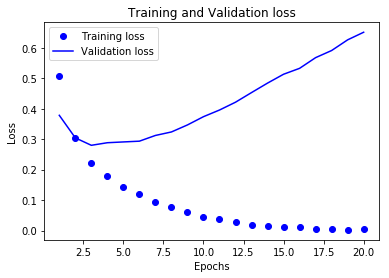

In [72]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

# 'bo'는 파랑 점을 의미
plt.plot(epochs, loss, 'bo', label = 'Training loss')
# 'b'는 파랑 실선을 의미
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 그래프 안에 표시|

plt.show()
# training loss는 점점 줄지만 train되지 않은 데이터에 대한 loss는 증가하고 있다. 즉 오버피팅되어 train data 안에서만 잘 작동하는 상태

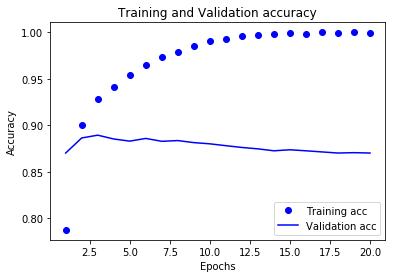

In [73]:
plt.clf() # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() # 그래프 안에 표시|

plt.show()